In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust.extinction.bhmie import *
from astrodust.distlib.composition import cmindex as cmi

/Users/lia/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
A   = np.logspace(-2, -1, 3) # grain radius, in microns
E   = np.logspace(-1, 1, 10)

In [4]:
bhm = BHmie(A, E, cmi.CmSilicate())

In [5]:
%%time
bhm.calculate()

('Filling D array using nmx = ', 5149)
CPU times: user 11.3 s, sys: 6.97 s, total: 18.2 s
Wall time: 18.2 s


In [6]:
bhm.X + 4.0 * np.power( bhm.X, 0.3333 ) + 2.0

array([[   13.93232797,    18.59267229,    25.75079116,    36.96093986,
           54.79447938,    83.51544583,   130.20673185,   206.64779725,
          332.44584368,   540.25770052],
       [   28.09440546,    40.66744026,    60.7366844 ,    93.14228925,
          145.92686113,   232.46921172,   375.04258759,   610.74887325,
         1001.41591838,  1650.10547241],
       [   67.4348    ,   104.0176381 ,   163.71488232,   261.72259608,
          423.3434699 ,   690.73053463,  1134.13476701,  1870.66534551,
         3095.58141231,  5134.48723258]])

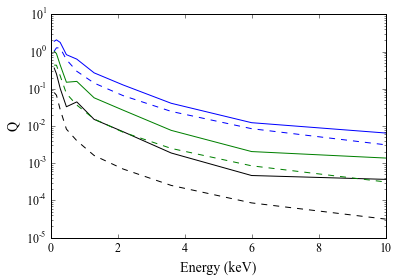

In [17]:
def plot_bhmie(ax, bh, n_a=0, **kwargs):
    ax.plot(E, bhm.Qsca[n_a,:], '--', **kwargs)
    ax.plot(E, bhm.Qext[n_a,:], **kwargs)
    ax.tick_params(labelsize=12)

ax = plt.subplot(111)
plot_bhmie(ax, bhm, color='k')
plot_bhmie(ax, bhm, 1, color='g')
plot_bhmie(ax, bhm, 2, color='b')
plt.semilogy()
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Q", size=14)

## Compare it to previous Mie scattering code

In [8]:
from astrodust.extinction.scatmodels import Mie

In [18]:
old_mie = Mie()

In [19]:
%%time
old_qsca = np.array([old_mie.Qsca(a=a, E=E, cm=cmi.CmSilicate()) for a in A])

('nmx = ', 555)
('nmx = ', 1665)
('nmx = ', 5149)
CPU times: user 2.51 s, sys: 120 ms, total: 2.63 s
Wall time: 2.63 s


In [29]:
%%time
old_qext = np.array([old_mie.Qext(a=a, E=E, cm=cmi.CmSilicate()) for a in A])

('nmx = ', 555)
('nmx = ', 1665)
('nmx = ', 5149)
CPU times: user 2.65 s, sys: 142 ms, total: 2.8 s
Wall time: 2.79 s


In [30]:
old_qext.shape

(3, 10)

In [37]:
def compare_bhmie_vs_old(ax, n_a=0, **kwargs):
    plot_bhmie(ax, bhm, n_a, **kwargs)
    ax.plot(E, old_qsca[n_a,:], alpha=0.2, lw=2, **kwargs)
    ax.plot(E, old_qext[n_a,:], alpha=0.2, lw=2, **kwargs)

[]

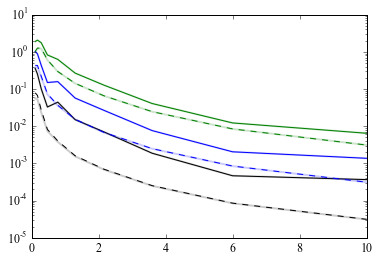

In [40]:
ax = plt.subplot(111)
compare_bhmie_vs_old(ax, color='k')
compare_bhmie_vs_old(ax, n_a=1, color='b')
compare_bhmie_vs_old(ax, n_a=2, color='g')
plt.semilogy()

### Compare stored items

In [ ]:
from astrodust import constants as c

**chi values**

In [ ]:
np.any((bhm.chi[:,0,:] - old_mie.chi) != 0)

In [ ]:
def test_chi(bhm, n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.chi[i+1,:])
        print(old_mie.chi[i+1,:])

In [ ]:
test_chi(bhm, 3, zero=2)

In [ ]:
old_mie.chi.shape, bhm.chi.shape

**an and bn**

In [ ]:
old_mie.an.shape, bhm.an.shape

In [ ]:
np.mean(bhm.an)

In [ ]:
np.mean(old_mie.an)

In [ ]:
def test_an(n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.an[i+1,0,:])
        print(old_mie.an[i+1,:])

def test_bn(n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.bn[i+1,0,:])
        print(old_mie.bn[i+1,:])

In [ ]:
test_an(3, zero=-1)

In [ ]:
test_bn(3, zero=-1)

In [ ]:
print(np.any((bhm.an[:,0,:] - old_mie.an) != 0),
      np.any((bhm.bn[:,0,:] - old_mie.bn) != 0))

**D matrix**

In [ ]:
old_mie.d.shape

In [ ]:
bhm.D.shape

In [ ]:
np.sum(bhm.D[:,0,:].T - old_mie.d)